<a href="https://colab.research.google.com/github/opherdonchin/ModelsOfTheMotorSystems2021-2/blob/master/HW2_RK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.stats import norm

plt.rcParams['font.size'] = '16'


# Homework 2

## Problem 1
Generate the following plots to match the plots in the lecture slides. Most
of the equations are taken from Thelen 2003 or from Buchanan 2004, if you
need help, although the notation is a little different.

### a.	Active force length curve

See slide 25 for equations

Text(0.5, 1.0, 'Active force length curve')

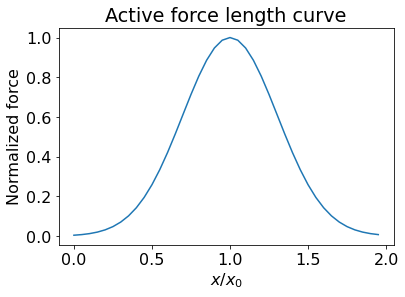

In [ ]:
xNorm = np.arange(start=0, stop=2, step=0.05)
w = 0.185

def x2Factive(xNorm=xNorm, w=w):
    return np.exp(-pow(xNorm-1,2) / w)

alpha = x2Factive(xNorm)

fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
ax.plot(xNorm, alpha)
ax.set_xlabel(r'$x / x_0$')
ax.set_ylabel(r'Normalized force')
ax.set_title('Active force length curve')

### b.	Passive force length curve

See slide 26 for equations

Text(0.5, 1.0, 'Passive force length curve')

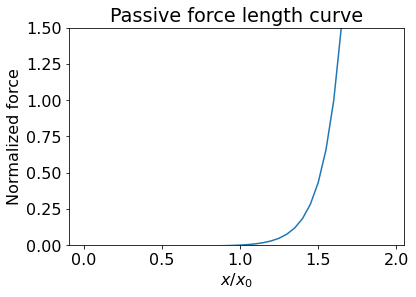

In [ ]:
xNorm = np.arange(start=0, stop=2, step=0.05)
k_pe = 5
e_pe = 0.6

def x2Fpassive(xNorm=xNorm, k_pe=k_pe, e_pe=e_pe):
    return (np.exp(k_pe*(xNorm-1)/e_pe)-1) / (np.exp(k_pe)-1)

F_pe = x2Fpassive(xNorm)

fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
ax.plot(xNorm, F_pe)
ax.set_xlabel(r'$x / x_0$')
ax.set_ylabel(r'Normalized force')
ax.set_ylim(0, 1.5)
ax.set_title('Passive force length curve')

### c.	Velocity force curve

See slide 28 for equations

Text(0.5, 1.0, 'Velocity force curve')

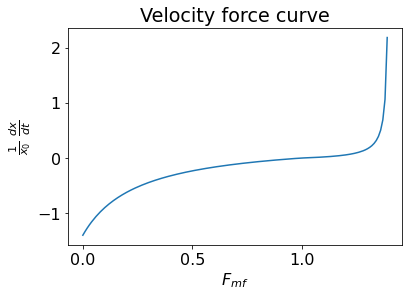

In [ ]:
F_mf = np.arange(start=0, stop=1.4, step=0.01)
gamma = 1
alpha = 1
Fmax_mf = 1.4
A_f = 0.25

def F_mf2xdot(F_mf, gamma=gamma, alpha=alpha,
              Fmax_mf=Fmax_mf, A_f=A_f):
    b = np.where(F_mf < gamma*alpha,
                 gamma*alpha + F_mf / A_f,
                 (2+2/A_f)*(gamma*alpha*Fmax_mf - F_mf)/(Fmax_mf - 1)
                 )
    return (0.25+0.75*gamma)*Fmax_mf*(F_mf-gamma*alpha)/b

xdot = F_mf2xdot(F_mf)

fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
ax.plot(F_mf, xdot)
ax.set_xlabel(r'$F_{mf}$')
ax.set_ylabel(r'$\frac{1}{x_0} ~ \frac{dx}{dt}$')
ax.set_title('Velocity force curve')

### d.	Force velocity curve

These are the same equations as part (c) but with the axes flipped

Text(0.5, 1.0, 'Force velocity curve')

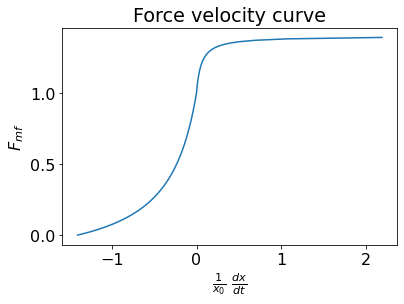

In [ ]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
ax.plot(xdot, F_mf)
ax.set_xlabel(r'$\frac{1}{x_0} ~ \frac{dx}{dt}$')
ax.set_ylabel(r'$F_{mf}$')
ax.set_title('Force velocity curve')

### e.	Tendon strain curve

See slide 32 for equations

Text(0.5, 1.0, 'Tendon strain curve')

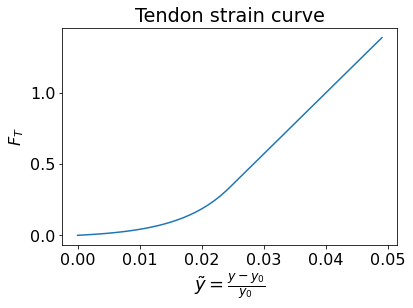

In [ ]:
yNorm = np.arange(start=0, stop=0.05, step=0.001)
FtoeT = 0.33
ktoe = 3.0
e0T = 0.04
etoeT = 0.609*e0T
klin = 1.712 / e0T

def y2FTendon(yNorm=yNorm,
              FtoeT=FtoeT, ktoe=ktoe, e0T=e0T, etoeT=etoeT, klin=klin):
    return np.where(yNorm < etoeT,
             FtoeT*(np.exp(ktoe*yNorm/etoeT)-1)/(np.exp(ktoe)-1),
             klin*(yNorm-etoeT)+FtoeT
             )

FT = y2FTendon(yNorm)

fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
ax.plot(yNorm, FT)
ax.set_xlabel(r'$\tilde{y} = \frac{y-y_0}{y_0}$', fontsize=18)
ax.set_ylabel(r'$F_{T}$')
ax.set_title('Tendon strain curve')


### f.	Activation dynamics

See slide 15 for equations

Here we have a differential equation, so we need to step it forward through time. We can
use the `odeint` function to do this as introduced in the "in class" exercise from the
beginning of the course.

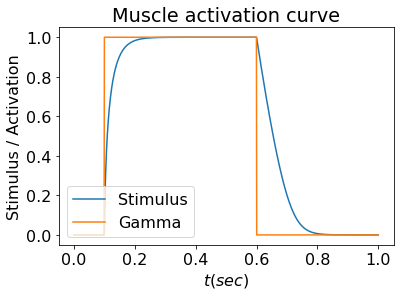

In [ ]:
tRange = np.linspace(start=0.0, stop=1.0, num=1000)
tau_act = 0.015
tau_deact = 0.05
gamma_init = 0.0

def STIM(t):
    return np.where((0.1 < t) & (t < 0.6), 1, 0)

# In this function definition, STIM has to be a function
def Stim2Gamma(tRange=tRange, STIM=STIM,
               gamma_init = gamma_init,
               tau_act=tau_act, tau_deact=tau_deact):

    def activation(gamma, t):
        tau = np.where(STIM(t) < gamma, tau_deact*(0.5+1.5*gamma), tau_act*(0.5+1.5*gamma))
        dgamma_dt = (STIM(t) - gamma)/tau
        return dgamma_dt

    gamma = odeint(activation, gamma_init, tRange)
    return gamma

gamma = Stim2Gamma(tRange, STIM, gamma_init)

fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
ax.plot(tRange, gamma)
ax.plot(tRange, STIM(tRange))
ax.set_xlabel(r'$t (sec)$')
ax.set_ylabel('Stimulus / Activation')
ax.set_title('Muscle activation curve')
ax.legend(['Stimulus', 'Gamma'], loc="lower left")


## Problem 2

Please program a Hill-type model as described in the
lecture and replicate the three graphs in the slides

### a.	500 ms stimulus at 0.1 s

We just do this by stepping through the steps in slides 37-39

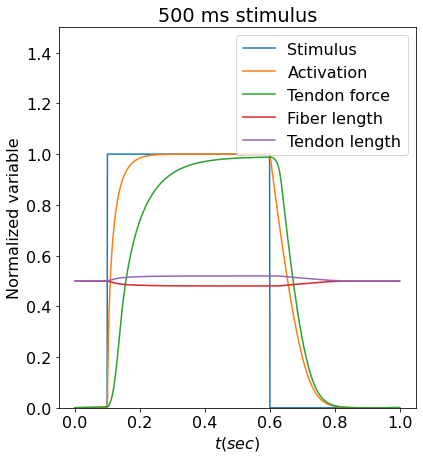

In [ ]:
tRange = np.linspace(start=0.0, stop=1.0, num=1000)
gamma_init = 0.00001

def STIM(t):
    return np.where((0.1<t) & (t<0.6), 1, 0)

STIM = np.zeros(len(tRange))
STIM[(0.1 < tRange) & (tRange < 0.6)] = 1

x_init = 0.5   # Initial muscle length
x0 = 0.5       # Resting muscle length
Lmt = 1.0      # Muscle + tendon length
theta = 0      # Muscle angle
y_init = Lmt - x_init*np.cos(theta) # Initial tendon length
y0 = 0.5       # Resting tendon length

def isometric_hill_model(tRange=tRange, STIM=STIM, gamma_init=gamma_init):
    x = np.empty_like(tRange)
    xdot = np.empty_like(tRange)
    y = np.empty_like(tRange)
    alpha = np.empty_like(tRange)
    Ft = np.empty_like(tRange)
    gamma = np.empty_like(tRange)
    gammadot = np.empty_like(tRange)

    dt = tRange[1]-tRange[0]

    x[0] = x_init
    y[0] = y_init
    gamma[0] = gamma_init
    for i in range(len(tRange)-1):
        # Step 1 / slide 37
        xNorm = x[i]/x0
        alpha[i] = x2Factive(xNorm)
        y[i] = Lmt - x[i]*np.cos(theta)
        yNorm = (y[i]-y0)/y0
        Ft[i] = y2FTendon(yNorm)
        Fpassive = x2Fpassive(xNorm)
        F_mf = (Ft[i] - Fpassive*np.cos(theta)) / np.cos(theta)

        # Step 2 / slide 38
        tau_gamma = 0.5+1.5*gamma[i]
        tau = tau_act*tau_gamma if STIM[i] > gamma[i] else tau_deact*tau_gamma
        gammadot[i] =  (STIM[i]-gamma[i])/tau
        gamma[i+1] = gamma[i] + gammadot[i]*dt

        xdot_norm = F_mf2xdot(F_mf, gamma=gamma[i], alpha=alpha[i])
        xdot[i] = x0*xdot_norm

        # Step 3 / slide 39
        # But Lmt is not updated because this is isometric
        x[i+1] = x[i] + xdot[i]*dt
        y[i+1] = y[i]

    return {
        'x': x,
        'y': y,
        'gamma': gamma,
        'Ft': Ft,
    }

h = isometric_hill_model(tRange=tRange,
                         STIM=STIM, gamma_init=gamma_init)

fig, ax = plt.subplots(figsize=[6.4, 7])
fig.patch.set_facecolor('white')
ax.plot(tRange, STIM)
ax.plot(tRange, h['gamma'])
ax.plot(tRange, h['Ft'])
ax.plot(tRange, h['x'])
ax.plot(tRange, h['y'])
ax.set_ylim(0, 1.5)
ax.set_xlabel(r'$t (sec)$')
ax.set_ylabel('Normalized variable')
ax.set_title('500 ms stimulus')
ax.legend(['Stimulus', 'Activation', 'Tendon force', 'Fiber length', 'Tendon length'],
          loc="upper right")


### b.	5 ms stimulus at 0.1

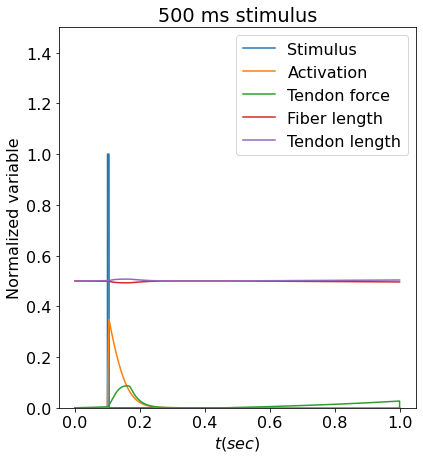

In [ ]:
tRange = np.linspace(start=0.0, stop=1.0, num=50000)

STIM = np.zeros(len(tRange))
STIM[(0.1 < tRange) & (tRange < 0.105)] = 1

h = isometric_hill_model(tRange=tRange,
                         STIM=STIM, gamma_init=gamma_init)

fig,ax = plt.subplots(figsize=[6.4, 7])
fig.patch.set_facecolor('white')
ax.plot(tRange, STIM)
ax.plot(tRange, h['gamma'])
ax.plot(tRange, h['Ft'])
ax.plot(tRange, h['x'])
ax.plot(tRange, h['y'])
ax.set_ylim(0, 1.5)
ax.set_xlabel(r'$t (sec)$')
ax.set_ylabel('Normalized variable')
ax.set_title('500 ms stimulus')
ax.legend(['Stimulus', 'Activation', 'Tendon force', 'Fiber length', 'Tendon length'],
          loc="upper right")

### c.	Constant stumulus at 0.6

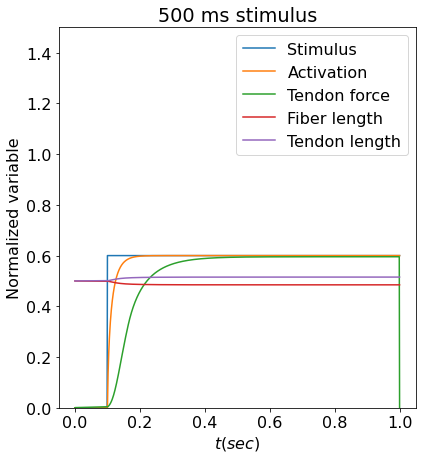

In [ ]:
tRange = np.linspace(start=0.0, stop=1.0, num=1000)

STIM = np.zeros(len(tRange))
STIM[0.1 < tRange] = 0.6

h = isometric_hill_model(tRange=tRange,
                         STIM=STIM, gamma_init=gamma_init)

fig,ax = plt.subplots(figsize=[6.4, 7])
fig.patch.set_facecolor('white')
ax.plot(tRange, STIM)
ax.plot(tRange, h['gamma'])
ax.plot(tRange, h['Ft'])
ax.plot(tRange, h['x'])
ax.plot(tRange, h['y'])
ax.set_ylim(0, 1.5)
ax.set_xlabel(r'$t (sec)$')
ax.set_ylabel('Normalized variable')
ax.set_title('500 ms stimulus')
ax.legend(['Stimulus', 'Activation', 'Tendon force', 'Fiber length', 'Tendon length'],
          loc="upper right")

This graph doesn't show the oscillations that we see in teh graph in the lecture. I'm not
really sure where they are coming from.